In [1]:
#importar librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt


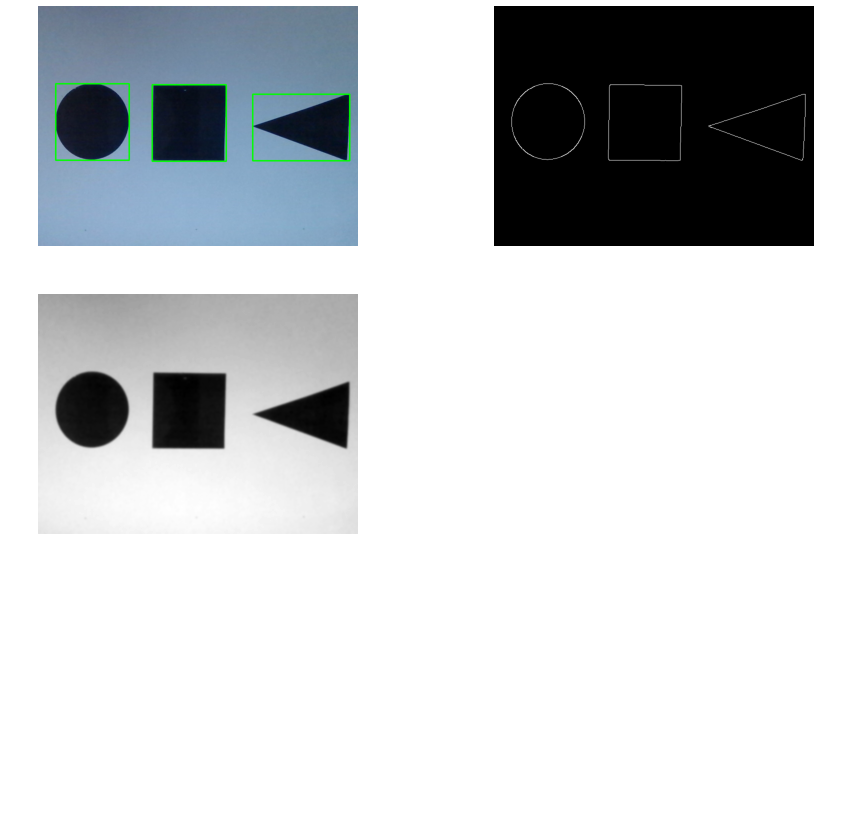

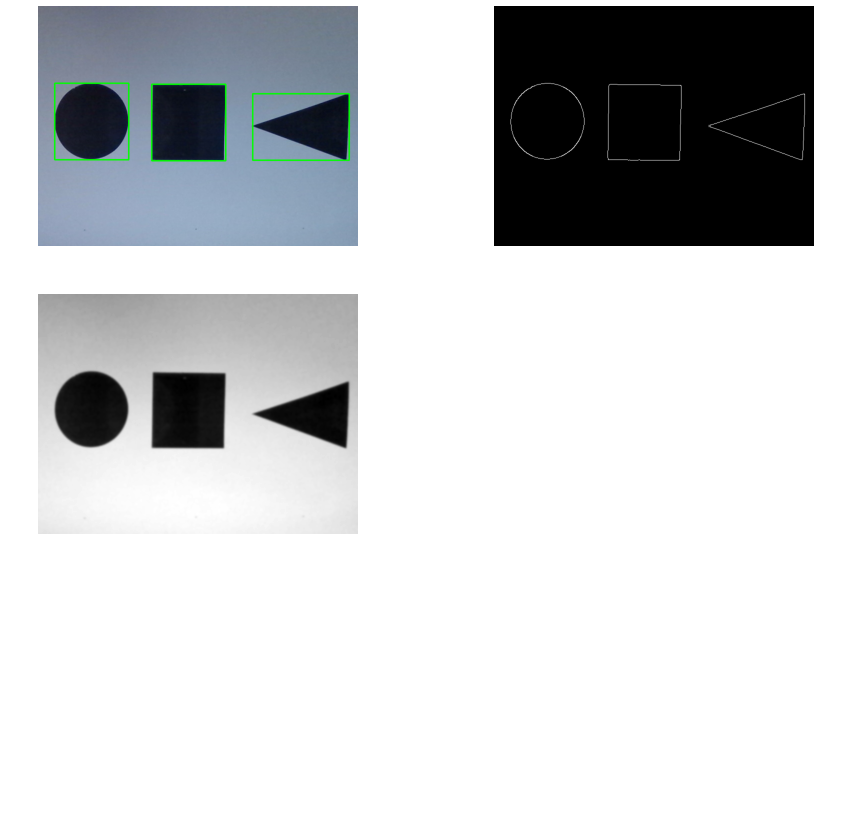

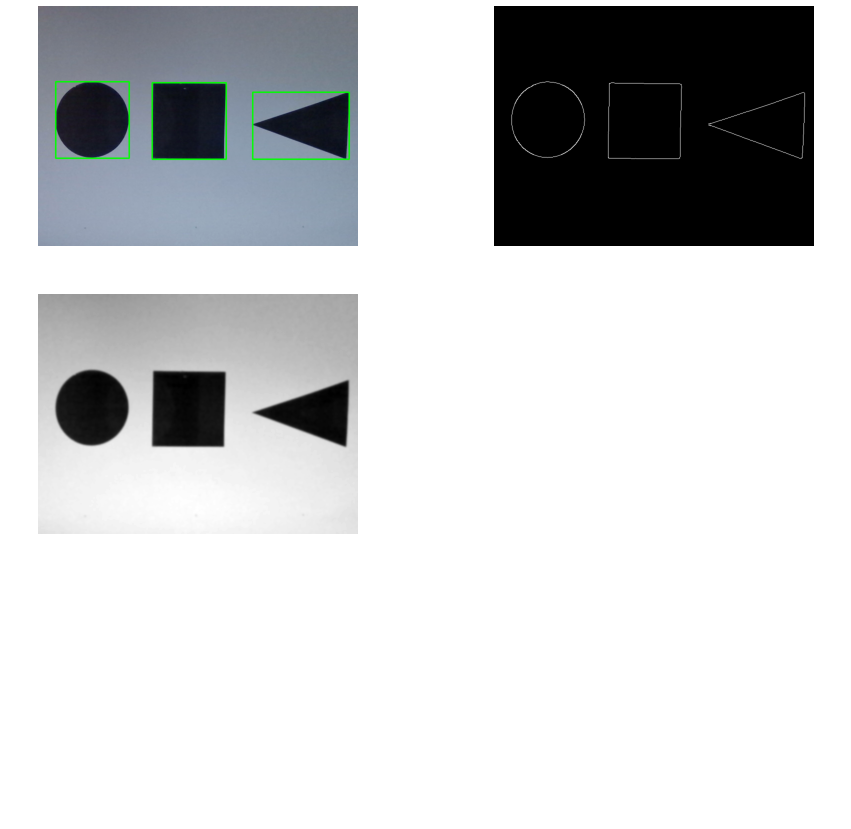

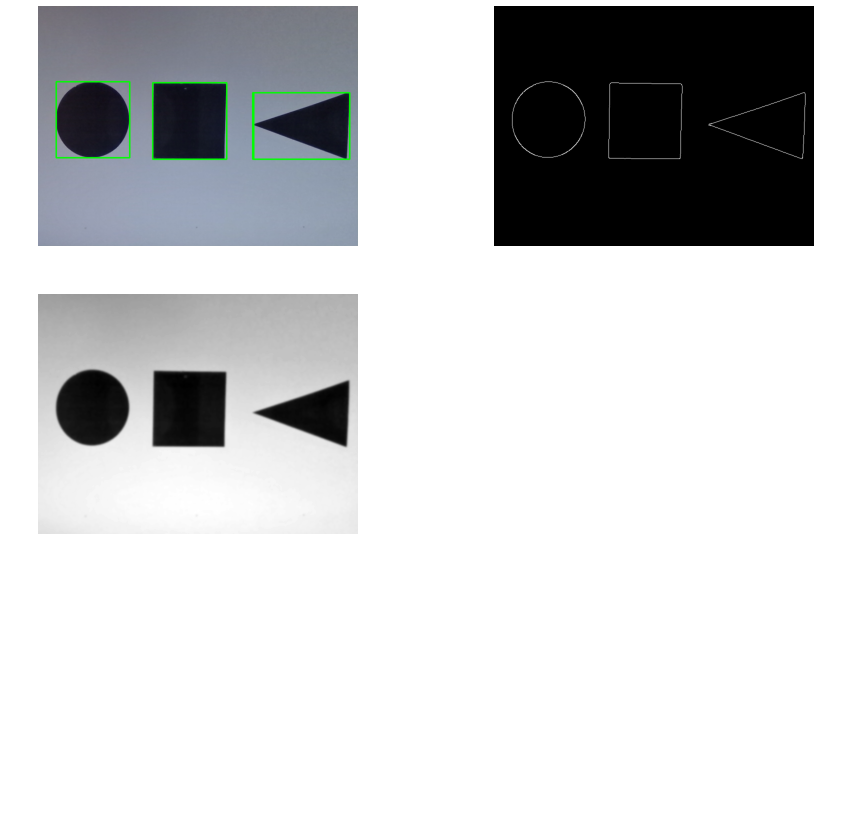

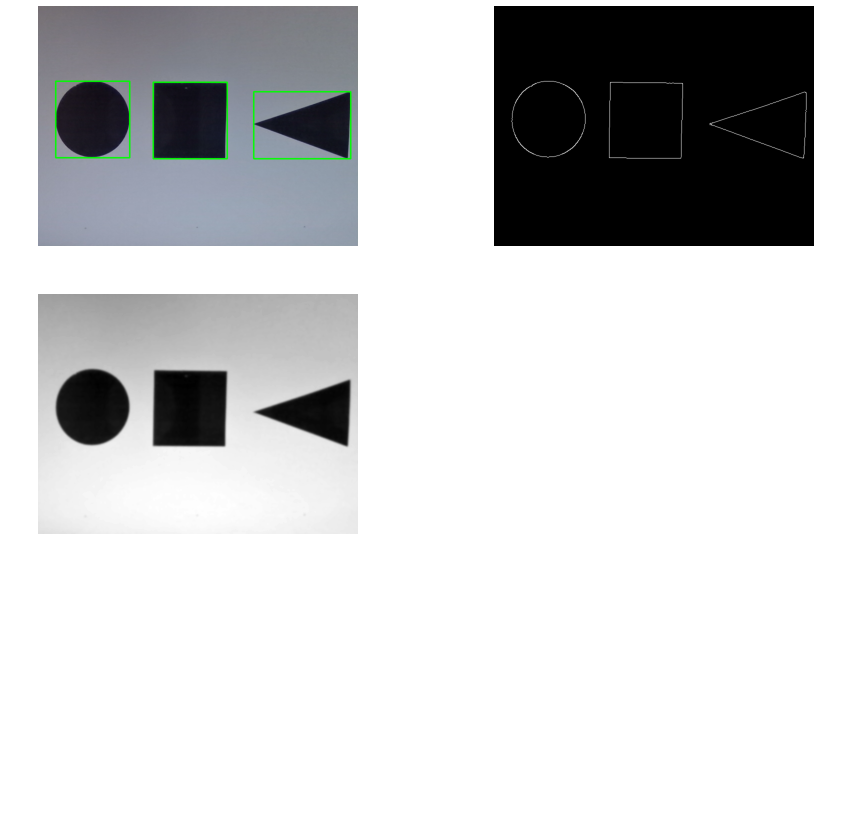

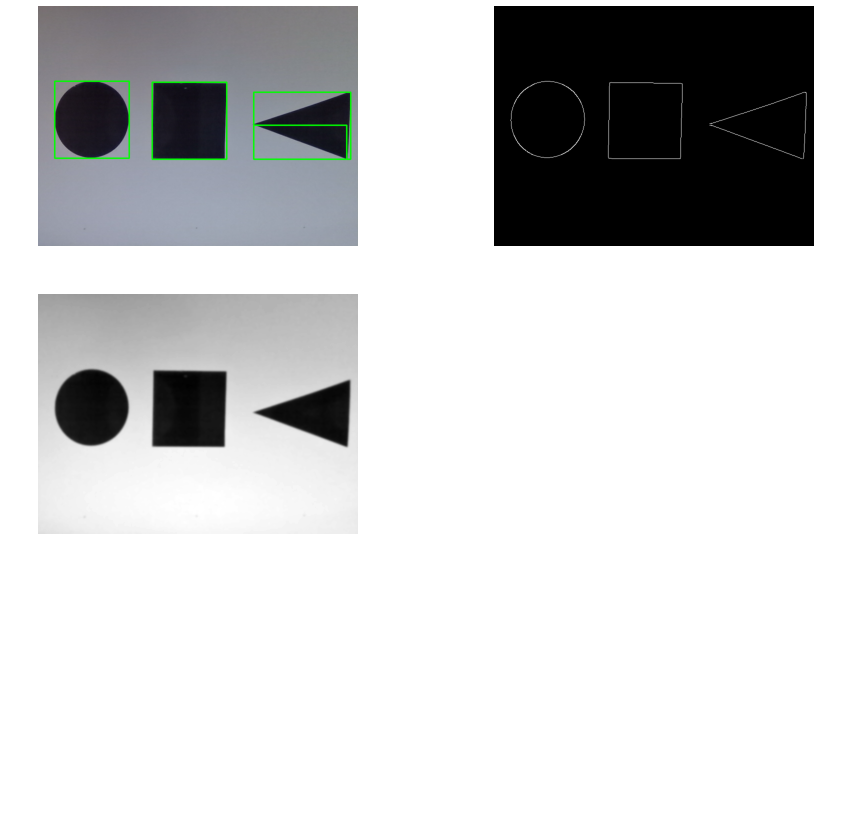

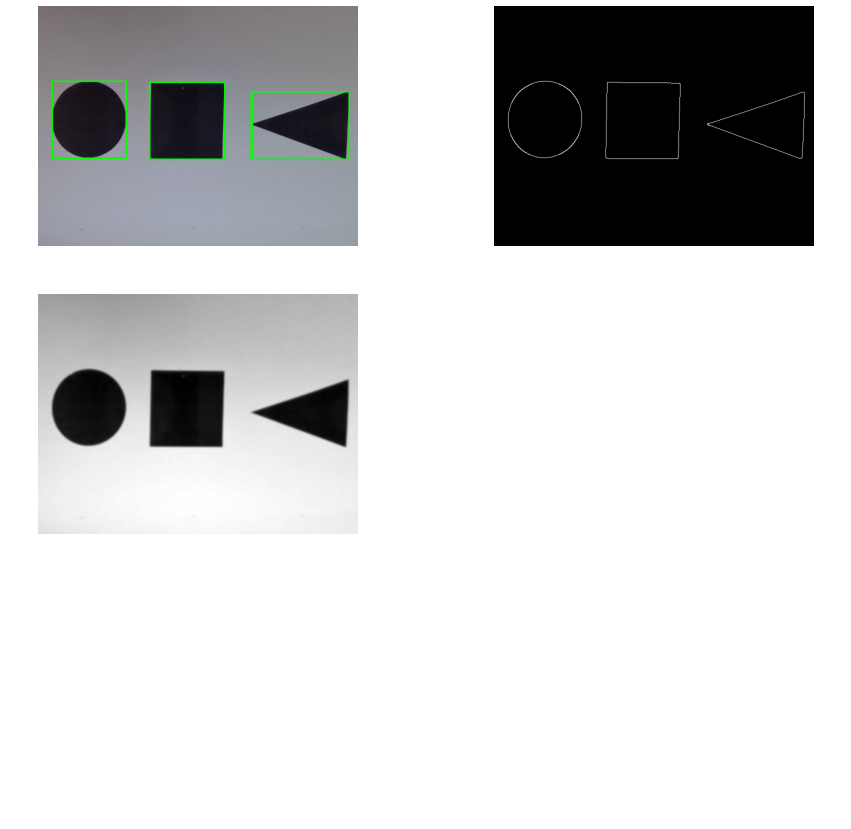

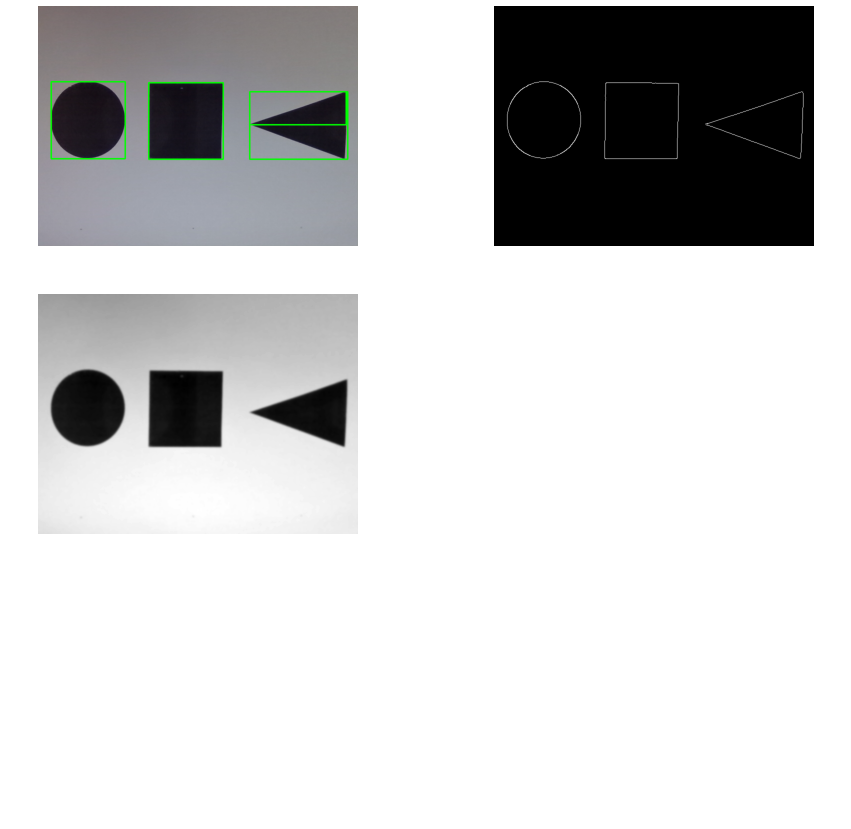

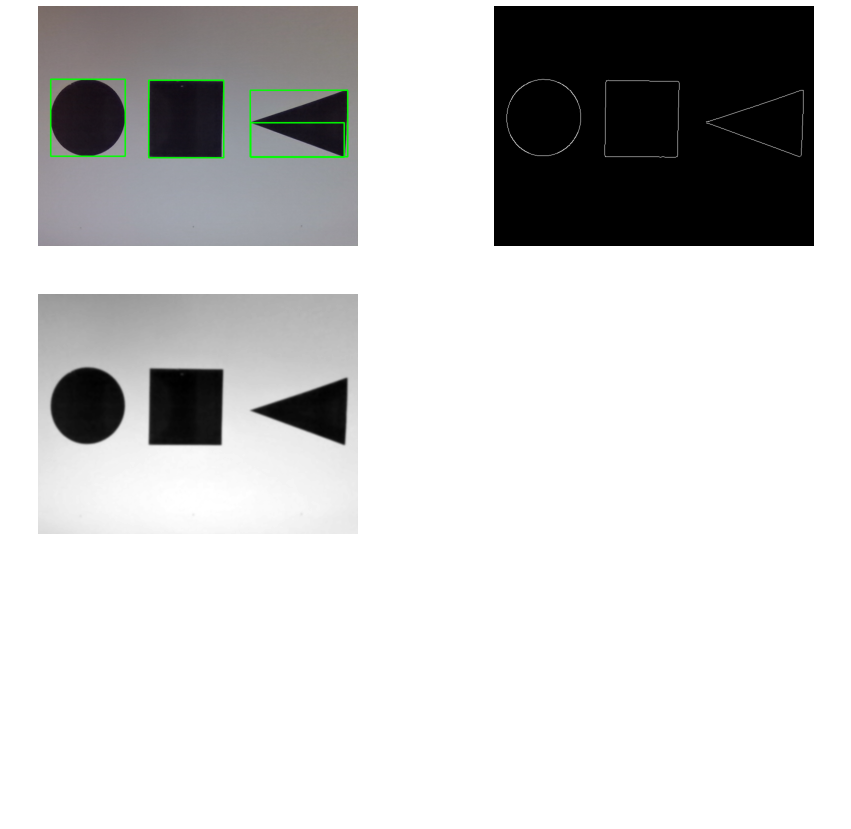

KeyboardInterrupt: 

In [2]:
cap = cv2.VideoCapture(0)

while True:
    #leer el video
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #convertir el video en escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #aplicar filtro gaussiano
    gray = cv2.GaussianBlur(gray, (9, 9), 0)

    #aplicar morphología
    gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))


    #deteccion de objetos con canny
    canny = cv2.Canny(gray, 100, 200)

    #separacion de objetos
    (contours, _) = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #dibujar contornos
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # acomodando las imagenes en una cuadricula de 3x2

    # Crear una figura con 6 subplots en una cuadrícula de 3x2
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    # Definir y mostrar cada imagen frame, canny y gray en un subplot diferente
    axs[0, 0].imshow(frame)
    axs[0, 0].axis('off')  # Opcional: oculta los ejes
    axs[0, 1].imshow(canny, cmap='gray')
    axs[0, 1].axis('off')  # Opcional: oculta los ejes
    axs[1, 0].imshow(gray, cmap='gray')
    axs[1, 0].axis('off')  # Opcional: oculta los ejes
    axs[1, 1].axis('off')  # Opcional: oculta los ejes
    axs[2, 0].axis('off')  # Opcional: oculta los ejes
    axs[2, 1].axis('off')  # Opcional: oculta los ejes

    plt.show()
    

   
    if cv2.waitKey(1) == ord('q'):
        break



# Resumen
## -- Mediante la funcion cv2.canny se puede lograr adquirir la detección de bordes y obtener los contornos que se requieren analizar

## -- Los filtros de suavizado y morfologicos permiten eliminar ruidos innecesarios para la obtencion de objetos

## -- El procesamiento de estas imagenes es de bajo coste computacional


